<img src="TP1_consigna.png" width="800px">

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

<h2>Parte 1</h2>

1. Implementar el algoritmo de pasaje a coordenadas cromáticas

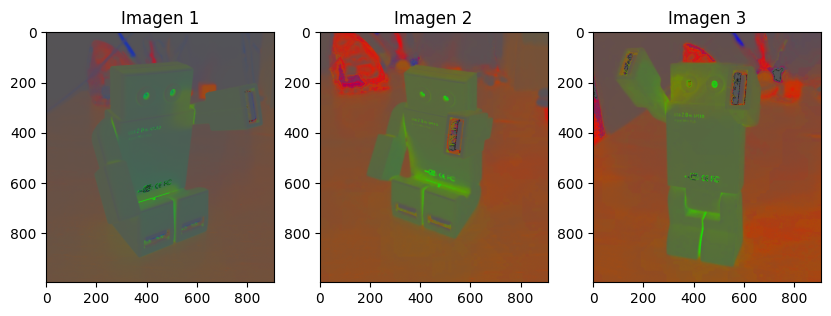

In [135]:
def coordenadas_cromaticas(img):
    img_float = img.astype(float)

    suma_rgb = np.sum(img_float, axis=2, keepdims=True)
    suma_rgb=np.repeat(suma_rgb, 3, axis=2)

    #Creamos una máscara para evitar las divisiones entre 0
    mask = suma_rgb > 0

    # Inicializa las coordenadas cromáticas con ceros
    coord_cromaticas = np.zeros_like(img_float)

    # Calcula las coordenadas cromáticas solo donde la suma es mayor que 0
    coord_cromaticas[mask] = img_float[mask] / suma_rgb[mask]

    return coord_cromaticas


img_coordcrom_1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img_coordcrom_1_RGB = cv.cvtColor(img_coordcrom_1, cv.COLOR_BGR2RGB)
img_coordcrom_2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img_coordcrom_2_RGB = cv.cvtColor(img_coordcrom_2, cv.COLOR_BGR2RGB)
img_coordcrom_3 = cv.imread('coord_cromaticas/CoordCrom_3.png')
img_coordcrom_3_RGB = cv.cvtColor(img_coordcrom_3, cv.COLOR_BGR2RGB)

#Graficamos. No es necesario normalizarlo a 255 con Matplotlib
fig = plt.figure(figsize=(10,5))

plt.subplot(131), plt.imshow(coordenadas_cromaticas(img_coordcrom_1_RGB)),plt.title("Imagen 1")
plt.subplot(132), plt.imshow(coordenadas_cromaticas(img_coordcrom_2_RGB)),plt.title("Imagen 2")
plt.subplot(133), plt.imshow(coordenadas_cromaticas(img_coordcrom_3_RGB)),plt.title("Imagen 3")

plt.show()

2. Implementar algoritmo White Patch

3. Mostrar los resultados obtenidos y analizar posibles fallas en White Patch

<h2>Parte 2</h2>

1. Leer imágenes con OpenCV en escala de grises y visualizarlas

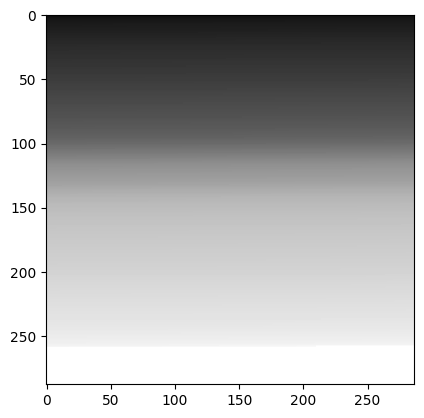

In [2]:
img_1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img_1, cmap='gray')
plt.show()

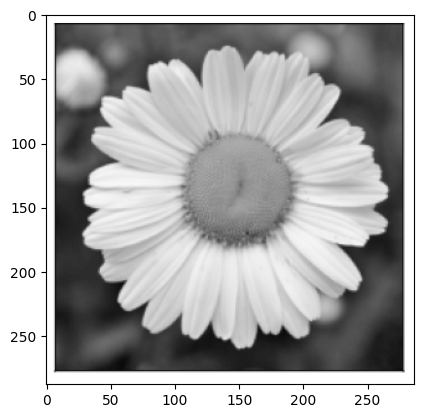

In [3]:
img_2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img_2, cmap='gray')
plt.show()

2. Graficar histograma y comparar. ¿Para clasificación/detección de imágenes se puede ser de utilidad tomar los histogramas como features?

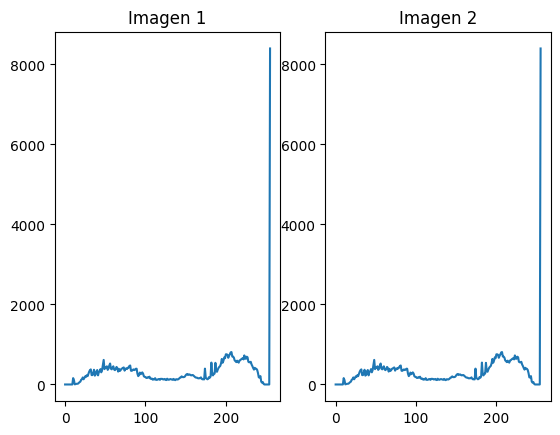

In [4]:
hist1,bins1 = np.histogram(img_1.ravel(),256,[0,256])
hist2,bins2 = np.histogram(img_2.ravel(),256,[0,256])

# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(121), plt.plot(hist1),plt.title("Imagen 1")
plt.subplot(122), plt.plot(hist2),plt.title("Imagen 2")

plt.show()

En este caso en particular, y como estamos analizando las 2 imágenes en escala de grises, los histogramas son iguales. Quiere decir que la cantidad de píxeles por nivel de intensidad es igual, a pesar de que las imágenes en realidad son completamente diferentes, ya que la ubicación de cada pixel en la imagen es lo que forma una figura como la flor, por ejemplo.

Debido a esto, los histogramas no serían de mucha utilidad si lo que se desea es detectar objetos o formas en una imagen. Es de ayuda únicamente para analizar propiedades de la imagen como el grado de contraste, el rango dinámico o el brillo. También te permite saber si la imagen ha sido editada o no.

3. Analizar histograma de segmentacion.png. Segmente y muestre regiones aplicando máscaras.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_color = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)

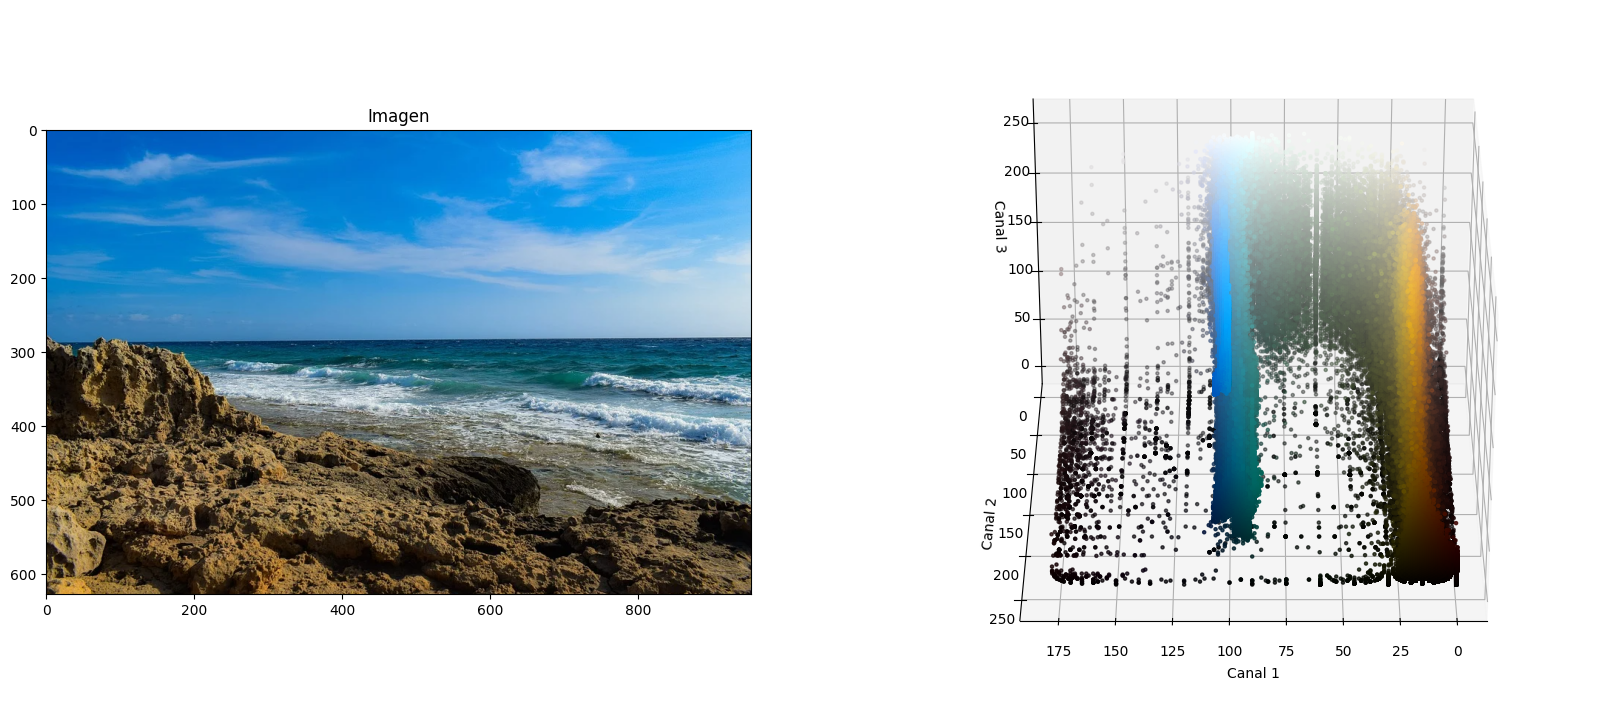

In [36]:
c1, c2, c3 = cv.split(img_HSV)

# c1, c2, c3 = cv.split(imgRGB)

fig = plt.figure(figsize=(20,12))
axis = fig.add_subplot(1, 2, 2, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")

axis.view_init(elev=30., azim=90.)

plt.subplot(121), plt.imshow(imgRGB),plt.title("Imagen")
plt.show()

En el histograma 3D con la imagen en HSV podemos ver que las áreas se diferencias más o menos bien a través del canal 1 (hue), sobre todo la tierra. El mar y el cielo están más juntos, pero igual se ven separables. En RGB no se ven cortes tan claros.

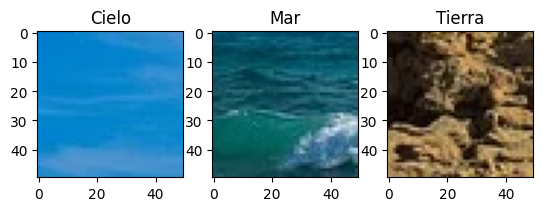

In [38]:
#Muestra del cielo
muestra_cielo_HSV = img_HSV[150:200, 200:250,:]
muestra_mar_HSV = img_HSV[300:350, 700:750,:]
muestra_tierra_HSV = img_HSV[450:500, 150:200,:]

muestra_cielo = imgRGB[150:200, 200:250,:]
muestra_mar = imgRGB[300:350, 700:750,:]
muestra_tierra = imgRGB[450:500, 150:200,:]

fig = plt.figure()

plt.subplot(131), plt.imshow(muestra_cielo,),plt.title("Cielo")
plt.subplot(132), plt.imshow(muestra_mar),plt.title("Mar")
plt.subplot(133), plt.imshow(muestra_tierra),plt.title("Tierra")
plt.show()

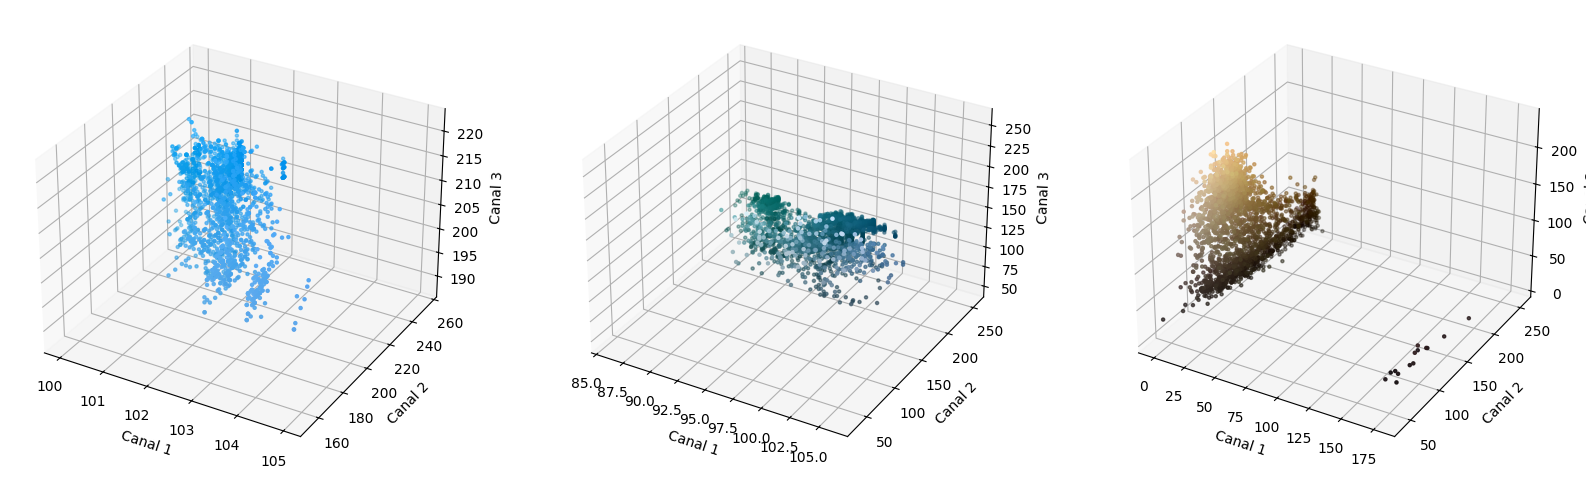

In [50]:
#Graficamos los histogramas de las muestras para darnos idea de los rangos

fig = plt.figure(figsize=(20,12))

#Cielo

c1, c2, c3 = cv.split(muestra_cielo_HSV)

axis1 = fig.add_subplot(1, 3, 1, projection="3d")

pixel_colors = muestra_cielo.reshape((np.shape(muestra_cielo)[0]*np.shape(muestra_cielo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis1.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis1.set_xlabel("Canal 1")
axis1.set_ylabel("Canal 2")
axis1.set_zlabel("Canal 3")

#Mar

c1, c2, c3 = cv.split(muestra_mar_HSV)

axis1 = fig.add_subplot(1, 3, 2, projection="3d")

pixel_colors = muestra_mar.reshape((np.shape(muestra_mar)[0]*np.shape(muestra_mar)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis1.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis1.set_xlabel("Canal 1")
axis1.set_ylabel("Canal 2")
axis1.set_zlabel("Canal 3")

#Tierra

c1, c2, c3 = cv.split(muestra_tierra_HSV)

axis1 = fig.add_subplot(1, 3, 3, projection="3d")

pixel_colors = muestra_tierra.reshape((np.shape(muestra_tierra)[0]*np.shape(muestra_tierra)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis1.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis1.set_xlabel("Canal 1")
axis1.set_ylabel("Canal 2")
axis1.set_zlabel("Canal 3")



plt.show()

In [46]:
# Extrae el canal Hue
hue_cielo = muestra_cielo_HSV[:, :, 0]
hue_mar = muestra_mar_HSV[:, :, 0]
hue_tierra = muestra_tierra_HSV[:, :, 0]

print("Rango cielo:", np.min(hue_cielo),np.max(hue_cielo), "mediana:",np.median(hue_cielo), "color medio:",cv.mean(muestra_cielo_HSV))
print("Rango mar:", np.min(hue_mar),np.max(hue_mar),"mediana:",np.median(hue_mar), "color medio:",cv.mean(muestra_mar_HSV))
print("Rango tierra:", np.min(hue_tierra),np.max(hue_tierra),"mediana:",np.median(hue_tierra), "color medio:",cv.mean(muestra_tierra_HSV))

Rango cielo: 100 105 mediana: 101.0 color medio: (101.4816, 225.45600000000002, 205.4472, 0.0)
Rango mar: 86 106 mediana: 96.0 color medio: (95.09360000000001, 206.6964, 108.12400000000001, 0.0)
Rango tierra: 0 178 mediana: 17.0 color medio: (16.5044, 139.94320000000002, 101.20880000000001, 0.0)


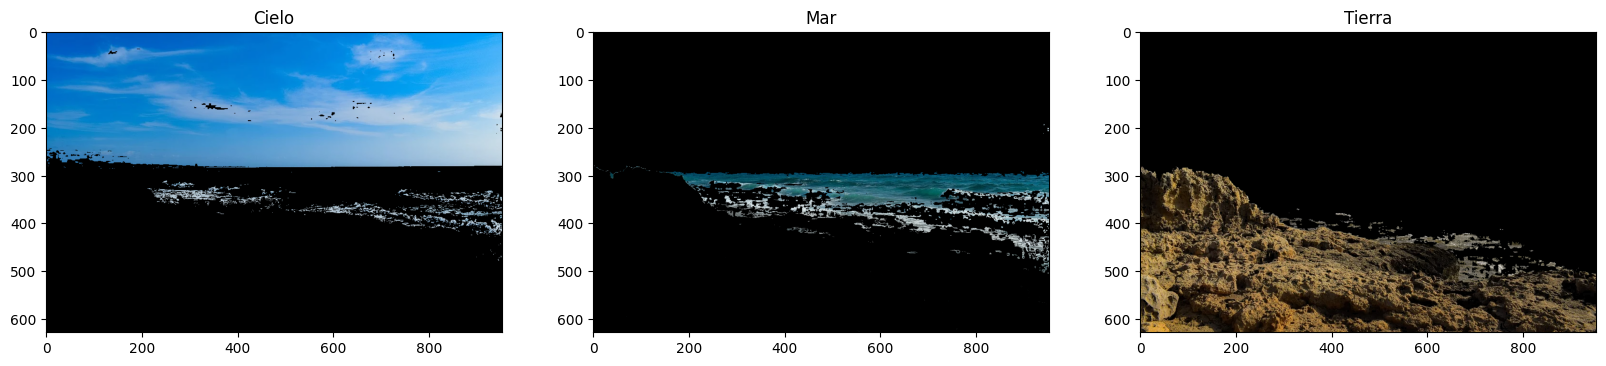

In [110]:
# Cielo del 100 al 105
# Mar del 86 al 100
# Tierra del 0 a al 25

color_l = (100,30,180)
color_u = (106,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

fig = plt.figure(figsize=(20,12))

plt.subplot(131), plt.imshow(img_segmentada,),plt.title("Cielo")

color_l = (86,0,0)
color_u = (99,255,250)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.subplot(132), plt.imshow(img_segmentada),plt.title("Mar")

color_l = (0,0,0)
color_u = (25,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.subplot(133), plt.imshow(img_segmentada),plt.title("Tierra")
plt.show()



Con los rangos seleccionados se puede separar un buen porcentaje de los elementos, únicamente vemos un poco de cruce entre cielo y mar en donde el agua refleja en cierta medida los colores del cielo.